In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('data/data_cleaned_PersonalProperty.csv', index_col=0)
df.head()

,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout
3,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0
7,2,"Reddy, Dawna",3,Science,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0
11,3,"Rivera, Johnna",3,Business,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0
15,4,"al-Jamil, Umaira",4,Business,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0
19,5,"el-Mohammed, Qutb",2,Business,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0


In [9]:
df_encoded = pd.get_dummies(df, columns=['study'], prefix='', prefix_sep='')
df_encoded.head()

,student_id,name,class,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout,Business,Humanities,Other,Science
3,1,"Saiz, Leslie",3,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0,False,True,False,False
7,2,"Reddy, Dawna",3,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0,False,False,False,True
11,3,"Rivera, Johnna",3,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0,True,False,False,False
15,4,"al-Jamil, Umaira",4,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0,True,False,False,False
19,5,"el-Mohammed, Qutb",2,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0,True,False,False,False


In [10]:
df_encoded[['Business', 'Humanities', 'Other', 'Science']] = df_encoded[['Business', 'Humanities', 'Other', 'Science']].apply(lambda x: x.map({True: '1', False: '0'}))
df_encoded.head()

,student_id,name,class,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout,Business,Humanities,Other,Science
3,1,"Saiz, Leslie",3,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0,0,1,0,0
7,2,"Reddy, Dawna",3,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0,0,0,0,1
11,3,"Rivera, Johnna",3,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0,1,0,0,0
15,4,"al-Jamil, Umaira",4,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0,1,0,0,0
19,5,"el-Mohammed, Qutb",2,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0,1,0,0,0


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns and rows with missing values
df_cleaned = df_encoded.drop(columns=['name', 'student_id', 'amount']).dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Perform PCA
pca = PCA(n_components=len(df_cleaned.columns))
pca.fit(df_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for the explained variance
explained_variance_df = pd.DataFrame({'Variable': df_cleaned.columns, 'Explained Variance': explained_variance})
explained_variance_df = explained_variance_df.sort_values(by='Explained Variance', ascending=False)

explained_variance_df.sort_values(by='Explained Variance', ascending=False)

,Variable,Explained Variance
0,class,1.391410e-01
1,gpa,1.177969e-01
2,is_greek,9.586273e-02
3,is_on_campus,9.539458e-02
4,distance_to_campus,9.488621e-02
5,is_female,7.907473e-02
6,is_sprinklered,7.409903e-02
7,claim_id,7.074459e-02
8,risk_tier,7.029451e-02
9,holdout,6.992225e-02


In [12]:
import pickle

# save
with open('pca.pkl','wb') as f:
    pickle.dump(pca,f)

<Axes: xlabel='Explained Variance', ylabel='Variable'>

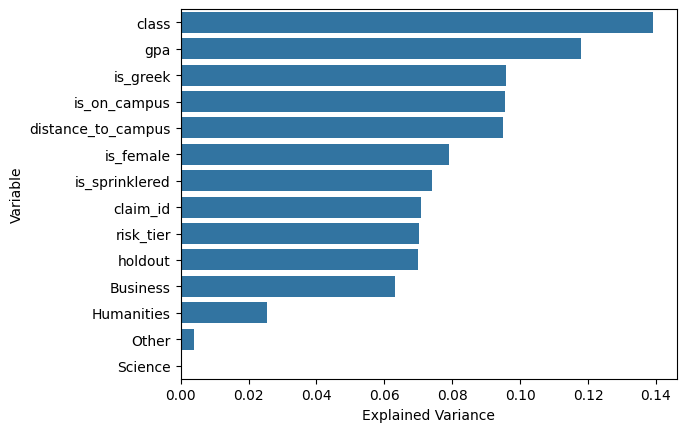

In [6]:
import seaborn as sns

sns.barplot(x='Explained Variance', y='Variable', data=explained_variance_df)

In [42]:
df_encoded = df_encoded[[col for col in df_encoded.columns if col != 'amount'] + ['amount']]
df_encoded

,student_id,name,class,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,risk_tier,holdout,Business,Humanities,Other,Science,amount
3,1,"Saiz, Leslie",3,1.203913,0,0,0.000000,0.0,1,0,2,0,0,1,0,0,0.0
7,2,"Reddy, Dawna",3,0.609616,0,0,0.000000,1.0,1,0,2,0,0,0,0,1,0.0
11,3,"Rivera, Johnna",3,3.073385,0,1,0.223942,1.0,0,0,2,0,1,0,0,0,0.0
15,4,"al-Jamil, Umaira",4,3.224736,0,0,0.000000,0.0,0,0,3,0,1,0,0,0,0.0
19,5,"el-Mohammed, Qutb",2,2.687851,0,0,0.000000,1.0,0,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,9996,"al-Mannan, Majdi",5,0.951238,0,1,10.200774,0.0,0,0,3,0,0,0,1,0,0.0
40058,9997,"Bislimi, Georgia",1,3.587587,1,1,0.844743,0.0,1,0,1,0,0,1,0,0,0.0
40062,9998,"Cheng, Thanh",2,1.860945,0,0,0.000000,0.0,0,0,1,0,0,0,1,0,0.0
40066,9999,"Duncan, Justin",1,2.508244,1,0,0.000000,1.0,1,0,1,0,1,0,0,0,0.0


In [44]:
df_encoded.to_csv('data/data_cleaned_twice.csv')